In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from linear_reg import (LinearReg, resid_plot, plot_real_vs_predicted,
                         normality_plot, grid_search_df, plot_r2_rmse)

In [2]:
np.set_printoptions(suppress=True)
data1 = np.loadtxt('./dataset/default_plus_chromatic_features_1059_tracks.txt', delimiter=',')

### Data1 Description

+ data1 is the data loaded from 'default_plus_chromatic_features_1059_tracks'.  
+ the number of samples  : 1059
+ the number of features : 116 
    - the first 116 columns are audio features of the track
+ the number of target   : 2
    - the last two columns are the d of the music.
+ Training data is allocated as 80 percent of the total data, and the rest is allocated as test data.

In [3]:
train_sample = round(len(data1) * 0.8)
train_X1, train_y1 = data1[:train_sample, :116], data1[:train_sample, 116:]
test_X1, test_y1 = data1[train_sample:, :116], data1[train_sample:, 116:]

### 2. Implement three regression models by your own codes to the following dataset. 

### 2-A. Vanilla liear regression

First, build a straightforward linear regression of latitude and longitude respectively against features. What is the R-squared of each model? Plot a graph evaluating each regression

In [4]:
lr = LinearReg()
lr.fit(train_X1, train_y1)
y_tr_pred = lr.predict(train_X1) 
y_te_pred = lr.predict(test_X1)

vanilla regression is start !


#### R-square of linear regression

In [5]:
lr.report_HW(train_X1, test_X1, train_y1, test_y1, report_type='r2')

Train total R-square : 0.3587
Test  total R-square : 0.0907
Train latitude R-square : 0.3106
Test  latitude R-square : 0.1131
Train longitude R-square : 0.4068
Test  longitude R-square : 0.0683


In [6]:
lr.report_HW(train_X1, test_X1, train_y1, test_y1, report_type='rmse')

Train total RMSE : 29.479
Test  total RMSE : 36.5037
Train latitude RMSE : 15.0804
Test  latitude RMSE : 18.4084
Train longitude RMSE : 38.8665
Test  longitude RMSE : 48.2304


#### Residual plot

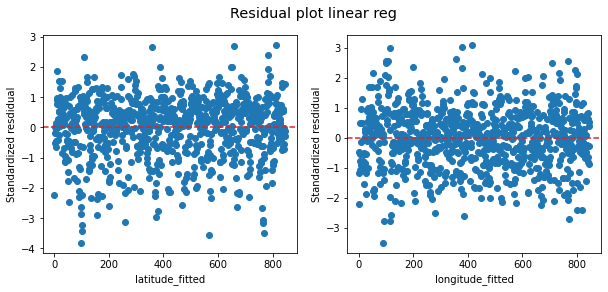

In [7]:
resid_plot(lr)

+ When looking at the residual plot, it can be seen that the data are generally linear.

#### QQ plot for normality test

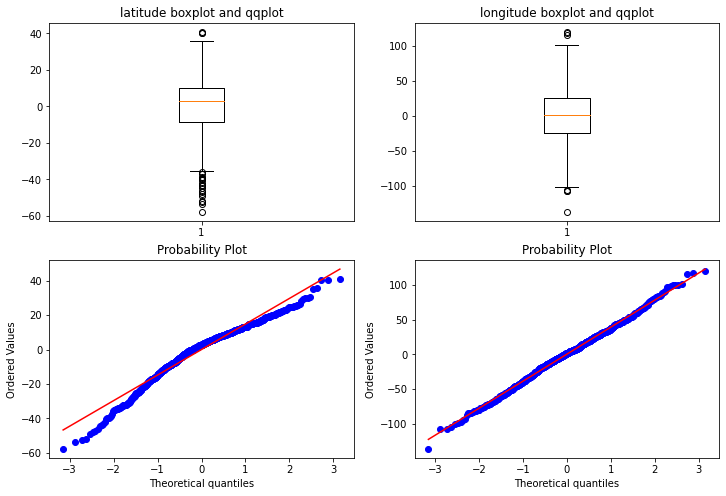

In [8]:
normality_plot(lr)

+ Compared to longitude, there are many outliers on the boxplot in latitude, and in Q-Q plot, it can be seen that longitude has normality in residuals compared to latitude.

#### predict vs y_true plot

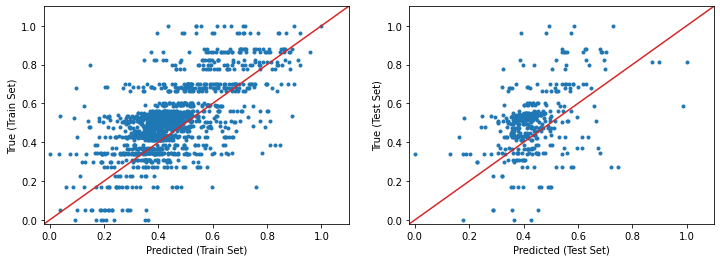

In [9]:
fig, axes = plt.subplots(1,2, figsize=(12,4))
plot_real_vs_predicted(train_y1, y_tr_pred, ax=axes[0], mode='Train Set')
plot_real_vs_predicted(test_y1, y_te_pred, ax=axes[1], mode='Test Set')

When the predicted value and the actual value match, the blue dots are gathered by a red line. However, in the real graph, you can see blue dots spread around the red line.

### 2-B. Ridge regression

A regression regularized by L2 (equivalently, a ridge regression). You should estimate the regularization coefficient that produces the minimum error. Is the regularized regression better than the unregularized regression?

### find best $\lambda$

In [10]:
lambdas_list = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1 ,1] + np.linspace(2, 400, 200).tolist()

In [11]:
ridge_score_df = grid_search_df(train_X1, train_y1, test_X1, test_y1, penalty='l2', lambdas_list=lambdas_list)

100%|███████████████████████████████████████████████████████████████████████████████| 208/208 [00:00<00:00, 218.95it/s]


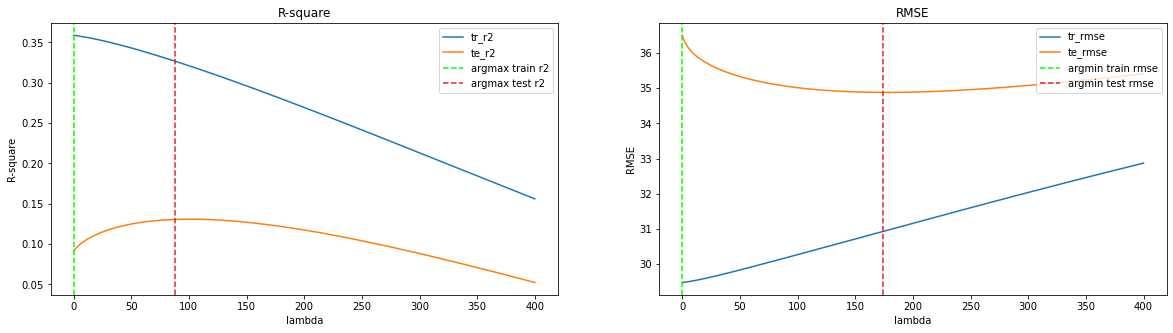

In [12]:
plot_r2_rmse(ridge_score_df, lambdas_list)

In [13]:
best_te_r2_idx = np.argmax(ridge_score_df.values[:,1].round(3), axis=0)
best_te_rmse_idx = np.argmin(ridge_score_df.values[:,3].round(3), axis=0)

In [14]:
print("best test r2 lambdas : ", ridge_score_df.iloc[best_te_r2_idx, :2].name)
print("best test rmse lambdas : ", ridge_score_df.iloc[best_te_rmse_idx, 2:].name)

best test r2 lambdas :  88.0
best test rmse lambdas :  174.0


+ In the ridge regression, the optimal model is selected while adjusting the lambda value.

+ If adjust the lambda value, It can be seen that the rsquare of the training set decreases and the rmse increases. However, rsquare and rmse of the test set are improved.

+ When the lambda value exceeds 88, the test set also decreases the Rsquare value, so 88 was chosen as the optimal lambda value.

### Using best $\lambda$

In [15]:
ridge = LinearReg(penalty='l2', alpha=88.0)
ridge.fit(train_X1, train_y1)

alpha set 88.0
ridge regression is start !


In [16]:
ridge.report_HW(train_X1, test_X1, train_y1, test_y1)

Train total R-square : 0.3267
Test  total R-square : 0.1305
Train latitude R-square : 0.2739
Test  latitude R-square : 0.11
Train longitude R-square : 0.3794
Test  longitude R-square : 0.1511


In [17]:
ridge.report_HW(train_X1, test_X1, train_y1, test_y1, report_type='rmse')

Train total RMSE : 30.1643
Test  total RMSE : 35.0683
Train latitude RMSE : 15.4772
Test  latitude RMSE : 18.4406
Train longitude RMSE : 39.752
Test  longitude RMSE : 46.0381


+ Compared with the results of vanilla linear regression, Rsquare decreases and RMSE increases in the training set, but Rsquare and RMSE of the test set improve.

### 2-C. LASSO regression

In [18]:
lambdas_list = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1 ,1, 1.5, 2]

In [19]:
lasso_score_df = grid_search_df(train_X1, train_y1, test_X1, test_y1, lambdas_list=lambdas_list, penalty='l1')

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:20<00:00,  2.52s/it]


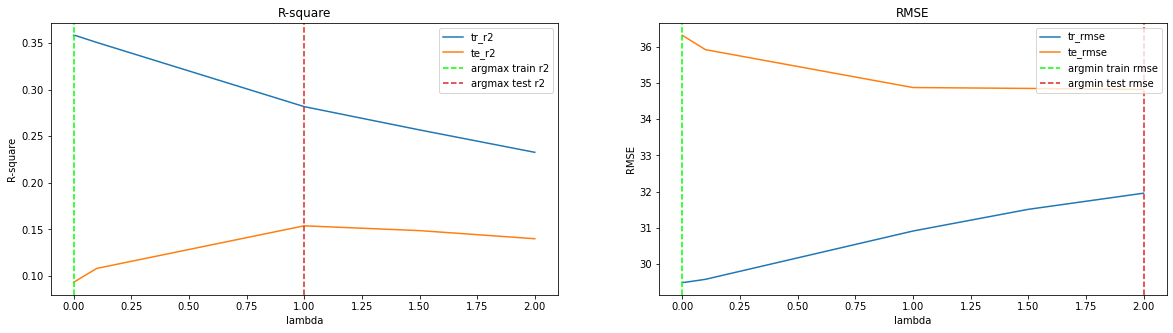

In [20]:
plot_r2_rmse(lasso_score_df, lambdas_list)

In [21]:
best_te_r2_idx = np.argmax(lasso_score_df.values[:,1].round(3), axis=0)
best_te_rmse_idx = np.argmin(lasso_score_df.values[:,3].round(3), axis=0)

In [22]:
print("best test rmse lambdas : ", lasso_score_df.iloc[best_te_r2_idx, :2].name)
print("best test r2 lambdas : ", lasso_score_df.iloc[best_te_rmse_idx, 2:].name)

best test rmse lambdas :  1.0
best test r2 lambdas :  2.0


+ LASSO regression also selects the optimal model while adjusting the lambda value.

+ If adjust the lambda value, It can be seen that the rsquare of the training set decreases and the rmse increases. However, rsquare and rmse of the test set have been improved.

+ If the lambda value exceeds 1.0, the test set also decreases the Rsquare value, so 1.0 was chosen as the optimal lambda value.

### Using best $\lambda$

In [23]:
lasso = LinearReg(penalty='l1', alpha=1.0, max_iter=1000, learning_rate=1e-4)

iter : 1000
alpha set 1.0
lasso regression is start !


In [24]:
lasso.fit(train_X1, train_y1)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:25<00:00, 39.10it/s]


In [25]:
lasso.report_HW(train_X1, test_X1, train_y1, test_y1)

Train total R-square : 0.2818
Test  total R-square : 0.1539
Train latitude R-square : 0.2118
Test  latitude R-square : 0.1525
Train longitude R-square : 0.3517
Test  longitude R-square : 0.1552


In [26]:
lasso.report_HW(train_X1, test_X1, train_y1, test_y1, report_type='rmse')

Train total RMSE : 30.91
Test  total RMSE : 34.8781
Train latitude RMSE : 16.1252
Test  latitude RMSE : 17.9943
Train longitude RMSE : 40.6304
Test  longitude RMSE : 45.9256


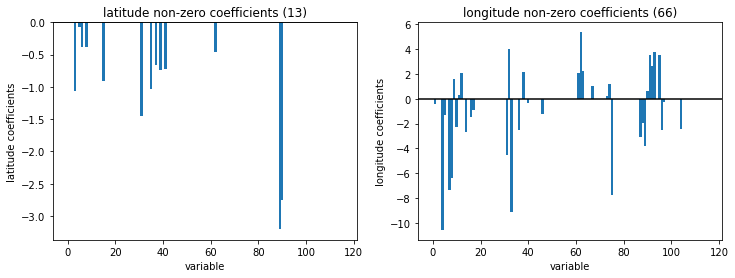

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].bar(range(len(lasso.w[1:,0])), lasso.w[1:,0], width=1)
axes[0].axhline(0, c='black')
axes[0].set_title('latitude non-zero coefficients ({})'.format(lasso.w.shape[0] - len(np.where(lasso.w[:,0] == 0)[0]) -1))
axes[0].set_ylabel('latitude coefficients')
axes[0].set_xlabel('variable')
axes[1].bar(range(len(lasso.w[1:,1])), lasso.w[1:,1], width=1)
axes[1].axhline(0, c='black')
axes[1].set_title('longitude non-zero coefficients ({})'.format(lasso.w.shape[0] - len(np.where(lasso.w[:,1] == 0)[0]) -1))
axes[1].set_ylabel('longitude coefficients')
axes[1].set_xlabel('variable')
plt.show()

+ When lambda is 1, the number of non-zero coefficients is 13 for longitude and 66 for latitude.

### 3. Summary

In common, in the case of ridge and lasso, it can be seen that the Rsquare of the training set decreases and the RMSE increases. However, it can be seen that the test set is improved. This can be interpreted that Ridge and Lasso alleviate overfitting in the training set.

In [37]:
raw_data = {'Train total R2': [lr.total_tr_r2, ridge.total_tr_r2, lasso.total_tr_r2],
            'Test total R2': [lr.total_te_r2, ridge.total_te_r2, lasso.total_te_r2],
            'Train lat R2': [lr.lat_tr_r2, ridge.lat_tr_r2, lasso.lat_tr_r2],
            'Test lat R2': [lr.lat_te_r2, ridge.lat_te_r2, lasso.lat_te_r2],
            'Train long R2': [lr.long_tr_r2, ridge.long_tr_r2, lasso.long_tr_r2],
            'Test long R2': [lr.long_te_r2, ridge.long_te_r2, lasso.long_te_r2]}
raw_data2 = {'Train total RMSE': [lr.total_tr_rmse, ridge.total_tr_rmse, lasso.total_tr_rmse],
            'Test total RMSE': [lr.total_te_rmse, ridge.total_te_rmse, lasso.total_te_rmse],
            'Train lat RMSE': [lr.lat_tr_rmse, ridge.lat_tr_rmse, lasso.lat_tr_rmse],
            'Test lat RMSE': [lr.lat_te_rmse, ridge.lat_te_rmse, lasso.lat_te_rmse],
            'Train long RMSE': [lr.long_tr_rmse, ridge.long_tr_rmse, lasso.long_tr_rmse],
            'Test long RMSE': [lr.long_te_rmse, ridge.long_te_rmse, lasso.long_te_rmse]}

In [40]:
result_r2 = pd.DataFrame(raw_data, index=['linear', 'ridge', 'lasso'])
result_r2

,Train total R2,Test total R2,Train lat R2,Test lat R2,Train long R2,Test long R2
linear,0.358701,0.090679,0.310633,0.113080,0.406768,0.068277
ridge,0.326652,0.130513,0.273874,0.109973,0.379429,0.151054
lasso,0.281750,0.153865,0.211797,0.152532,0.351703,0.155198


In [41]:
result_rmse = pd.DataFrame(raw_data2, index=['linear', 'ridge', 'lasso'])
result_rmse

,Train total RMSE,Test total RMSE,Train lat RMSE,Test lat RMSE,Train long RMSE,Test long RMSE
linear,29.479024,36.503714,15.080390,18.408405,38.866535,48.230415
ridge,30.164292,35.068263,15.477229,18.440624,39.752037,46.038131
lasso,30.909958,34.878070,16.125237,17.994322,40.630379,45.925635
